<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A17_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm


Q1 Provide a general multiple linear regression equation and explain all the
terms

The general mutiple linear regression euqation is : Y = b0+ b1X1+ b2X2 + e
The y in this eqaution is the dependent variable, beta 0 is the y intercept,b0 is the value of Y when all of the independent variables are zero.  X1 and X2 are different distinct independent or predictor variables. And b1 through b2 are the estimated regression coefficients. e is the error

Q2: Explain the concept of a dummy variable and how such variables are
calculated. Why is it necessary to convert nominal variables to dummy variables when performing linear regression?

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in the study. Dummy variables also takes values of 0 and 1, where the values indicate the presence or absence of something. It is important to convert variables to dummy becuase dummy variables are specifically for regression analysis that take on one of two values that are zero or one. And the numeric variables used in regression analysis to represent categorical data that can only take on 1 and 0.  


Q3.State all the assumptions of multiple linear regression

The key assumptions of multiple linear regression are: 
-There must be a linear relationship between the outcome variable and the independent variables.
-Multiple regression assumes that the residuals are normally distributed.
-Multiple regression assumes that the independent variables are not highly correlated with each other. 

Q4. Explain the concept of homoscedasticity as it relates to multiple linear
regression.

homoscedasticity is the assumption that describes a situation in which the error term is the same across all values of the independent variables. It is essentially stating that there's no pattern in the model that could impact the prediction towards a better ot worse result. 

Q5 Explain the purpose and interpretation of a QQ-Plot. What is a QQ-Plot
used for when assessing assumptions of multiple linear regression?

QQ plot analyze and compare two probability distributions by plotting their quantiles against each other. It is important in mutiple linear regression model becuase qq plot access the normality of the regression and can check if the points lie approximately on the line of the regression. 

Q6 Explain the difference between R-Squared and Adjusted R-Squared. Why is
Adjusted R-squared required when assessing multiple linear regression models?

The biggest difference between the two is that adjusted R-squared considers and tests different independent variables against the model and R-squared does not. Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. Adding more independent variables or predictors to a regression model tends to increase the R-squared value due to its higher accuracy towards the reliablity of a correlation 

Q7. Discuss the relationships between the dependent variable and each
independent variable based on the scatterplots and grouped boxplot obtained. Does each independent variable appear to be correlated with fish weight? If so, is the correlation positive or negative? Is the correlation linear? Does the distribution of weight seem to vary by species? Does the relationship between weight and each continuous variable appear to be different between species?

In both our generated scatterplots and boxplot, we can observe a pattern and postive correlation between the independent variables (length, height and width) and the dependent variable (weight). The correlation is not really perfectly linear but still has a good linear upward trend. The distribution of weight does seem to vary by species from the boxplot. We can indicate that the pikes and perchs are distributed more on the heavier weight side. The relationship between weight and all other independent variables do show some degree of differneces between species, but the general trend of all fish species shows positive correlation. 


Q8. Describe the model performance using the obtained Adjusted R-Squared
and RMSE values. Also, discuss the coefficients obtained. What variable coefficients were found to be statistically significant in the model? 

Based on our outputs of our adjusted R value and RMSE values, the adjusted r value is arouind 0.931, and the root mean sqaure error is about 90.21. The standards for a good R-Squared reading can be much higher, such as 0.9 or above 
, which means our adjust r result is performing well for this regression model. But lower RESM suggess better predictive performance. The RMSE is still not as low as the best optimal result, which means tehre's still some errors exsit in this model. From our generated graphs and model resuts, the most siginificant variables are fish speices pike and smelt and we can observe a stronger postive correlation among these fish species with our dependent variable "weight". 


Q9. Discuss the graphs obtained in Task 7 and 8. Do these graphs suggest issues
of normality of the residuals and/or homoscedasticity in the model?

In a QQ plot,the y-axis displays actual data and the x-axis displays the theoretical quantiles. our generated qq plot graph is not ideal and I am not sure either if the dataset has some error for the qq plot, ot the data actualy displays that way that shows no normal distribution at all since the qq plot is not align with the 45 degree line. If my output qq plot is accurate with no real errors then I don't think this model achieved normality from my observation. Graph 8 does show certain pattern for the residual and homoscedasticity tests. Our residual output graph indicates there's little to none homoscedasticity in this model becuase there's a upward trend pattern and homoscedasticity should show no pattern at all in the model. 

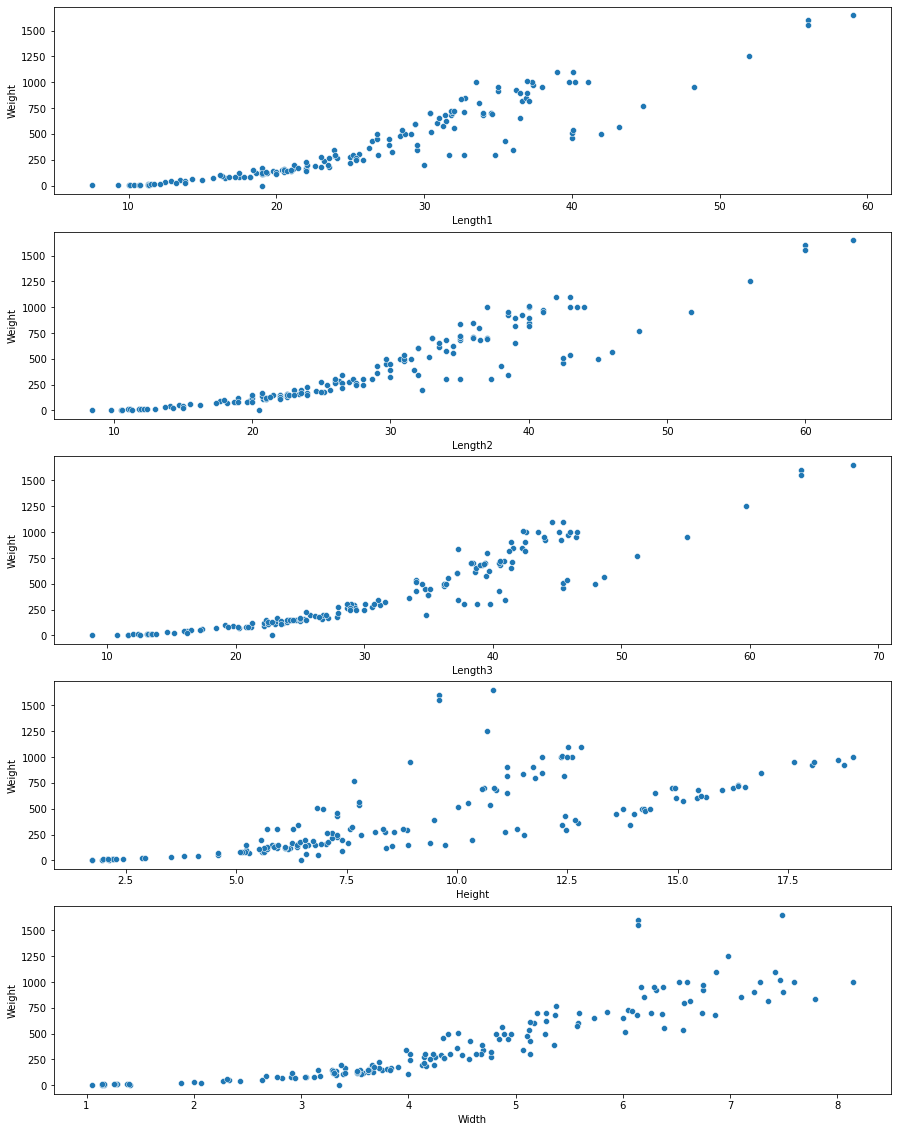

In [ ]:
#Task 1 Create separate scatterplots to compare the fish weight (“Weight”) to each of the
#continuous independent variables: “Length1”, “Length2”, “Length3”, “Height”, and “Width”
Fish=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/Fish.csv")
plt.rcParams['figure.figsize'] = [15, 20]
fig, axs =plt.subplots(5,1)
sns.scatterplot(ax= axs[0], x="Length1", y= "Weight", data= Fish)
sns.scatterplot(ax= axs[1], x="Length2", y= "Weight", data= Fish)
sns.scatterplot(ax= axs[2], x="Length3", y= "Weight", data= Fish)
sns.scatterplot(ax= axs[3], x="Height", y= "Weight", data= Fish)
sns.scatterplot(ax= axs[4], x="Width", y= "Weight", data= Fish)

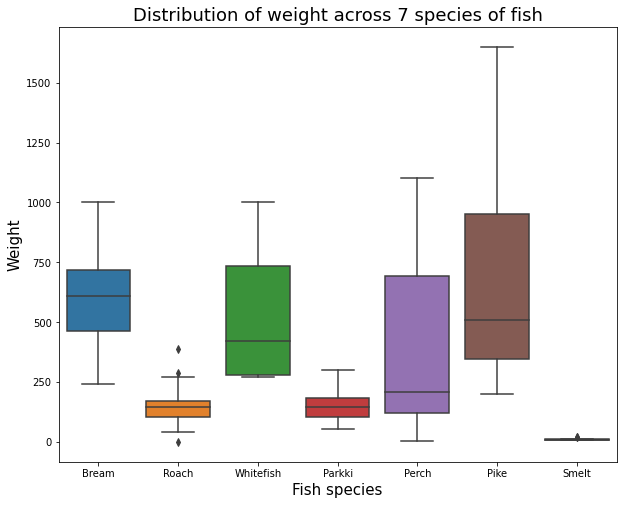

In [ ]:
#Task 2 Create a grouped box plot to compare the distribution of weight amongst the seven different species included in the dataset.

# Boxplot of fish weight across species
plt.rcParams['figure.figsize'] = [10, 8]
box_plot, axs = plt.subplots(1,1)
sns.boxplot(ax = axs, x = "Species", y = "Weight", data = Fish)
axs.set_title("Distribution of weight across 7 species of fish", fontsize = 18)
axs.set_xlabel("Fish species", fontsize = 15)
axs.set_ylabel("Weight", fontsize = 15)
plt.show(box_plot)

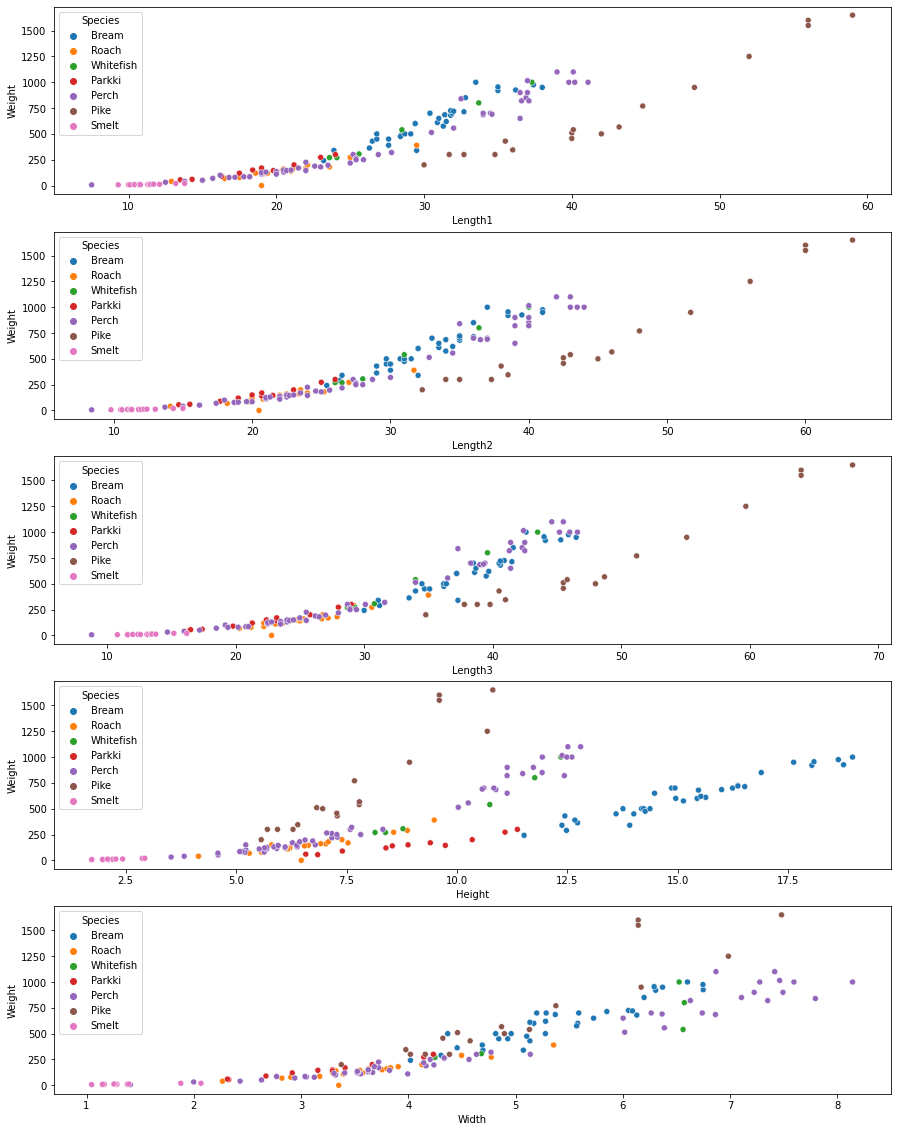

In [ ]:
#task 3 : Recreate the scatterplots from Task 1. However, this time differentiate the different species using the color of each data point

plt.rcParams['figure.figsize'] = [15, 20]
fig, axs =plt.subplots(5,1)
sns.scatterplot(ax= axs[0], x="Length1", y= "Weight", hue= "Species" ,data= Fish)
sns.scatterplot(ax= axs[1], x="Length2", y= "Weight",hue= "Species" ,data= Fish)
sns.scatterplot(ax= axs[2], x="Length3", y= "Weight",hue= "Species" ,data= Fish)
sns.scatterplot(ax= axs[3], x="Height", y= "Weight", hue= "Species",data= Fish)
sns.scatterplot(ax= axs[4], x="Width", y= "Weight",hue= "Species", data= Fish)

In [ ]:
#Task4 Create dummy variables for the species variable (“Species”)
SD=pd.get_dummies(Fish["Species"])
SD

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [ ]:
#Task 5. Fit a multiple linear regression model that predicts “Weight” using the available
#continuous variables (“Length1”, “Length2”, “Length3”, “Height”, and “Weight”) and
#the dummy variables representing the species (“Species”)

F2=pd.concat([Fish,SD],axis=1)
F2
#xvar and yvar
xvars=F2[["Length1","Length2","Length3","Height","Width","Bream","Parkki","Perch","Pike","Roach","Smelt","Whitefish"]]
yvars=F2[["Weight"]]

lm=LinearRegression()
lm.fit(xvars,yvars)
predict=lm.predict(xvars)
predict

In [ ]:

#Task6 Calculate or obtain the Adjusted R-Squared and RMSE metrics for the model
print(mean_squared_error(yvars,predict, squared= False))
R2= r2_score(yvars,predict)
AR= ((1-((1-R2)*(len(yvars)-1)/(len(yvars)-xvars.shape[1]-1))))
AR


90.21701053757434


0.9308316063373724

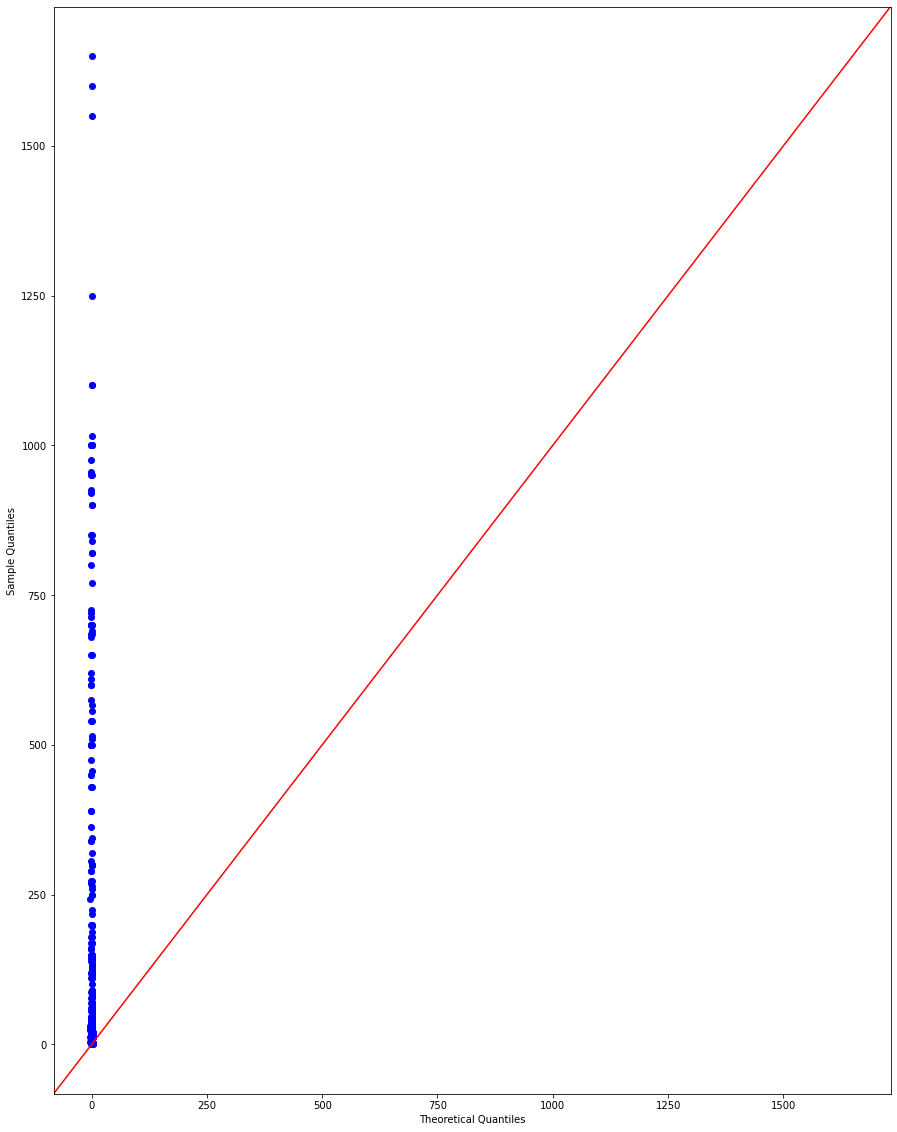

In [ ]:
#Task 7 Calculate a QQ-Plot to assess the model assumptions
# Create a new dataset without the fish species
fish3 = F2[["Length1", "Length2", "Length3", "Height", "Width", "Weight"]]

# Q-Q plot
fig=sm.qqplot(fish3,line='45')
plt.show()

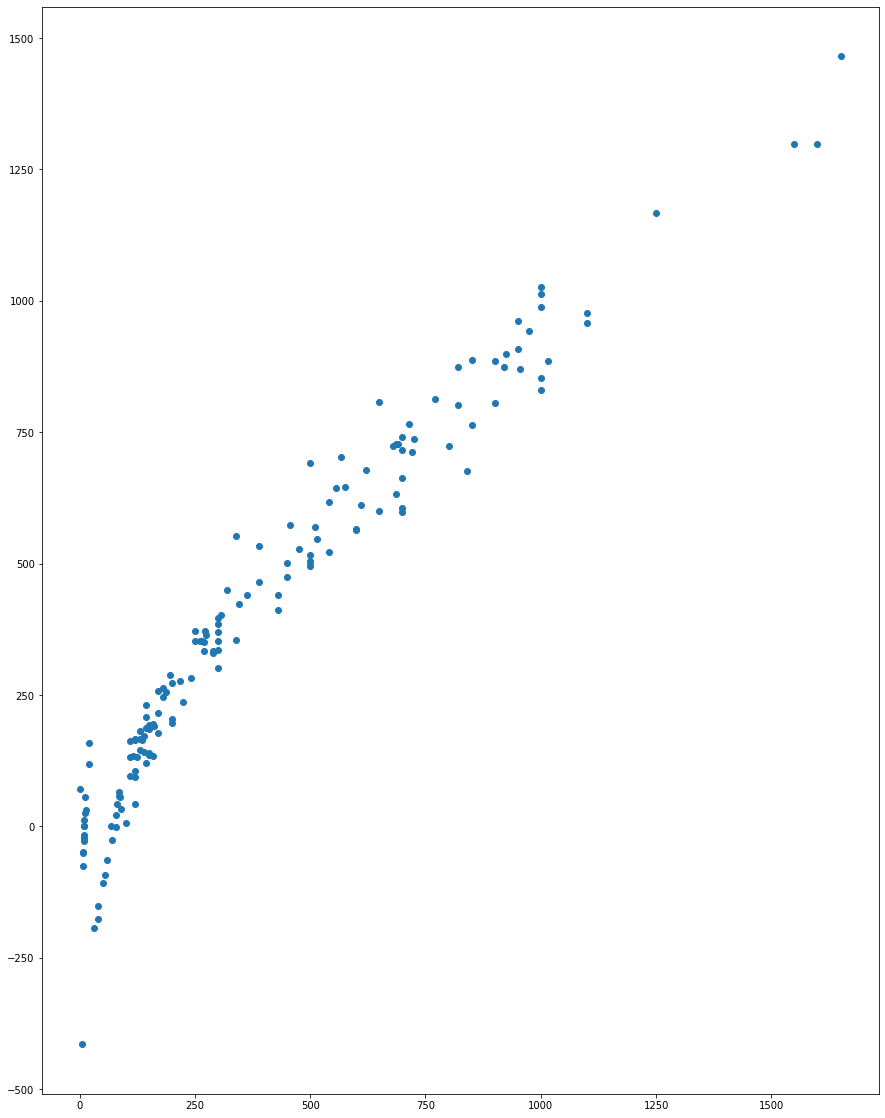

In [ ]:
#task8 Create a plot with the “Weight” values mapped to the x-axis and the residuals mapped to the y-axis to assess homoscedasticity
plot=plt.scatter(F2.Weight, predict)